In [ ]:
pip install -U d2l 

     |████████████████████████████████| 82 kB 556 kB/s 
     |████████████████████████████████| 9.9 MB 23.0 MB/s 
     |████████████████████████████████| 11.2 MB 42.7 MB/s 
     |████████████████████████████████| 15.7 MB 25.4 MB/s 
     |████████████████████████████████| 61 kB 5.4 MB/s 
     |████████████████████████████████| 930 kB 35.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's depende

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

UsageError: unrecognized arguments: # Only use this if using iPython


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.2140 - accuracy: 0.9358
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0887 - accuracy: 0.9727
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0646 - accuracy: 0.9801
Epoch 4/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0460 - accuracy: 0.9852
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0390 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0308 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0263 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0216 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0219 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 35s 19m

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0571 - accuracy: 0.9855


[0.057072773575782776, 0.9854999780654907]

9


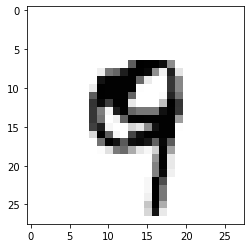

In [ ]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())